Top 6 features based on correlation:
['concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst']
Training Accuracy: 1.0000
Test Accuracy: 0.9561

Confusion Matrix:
[[70  2]
 [ 3 39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        72
           1       0.95      0.93      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


ROC AUC Score:
0.996031746031746


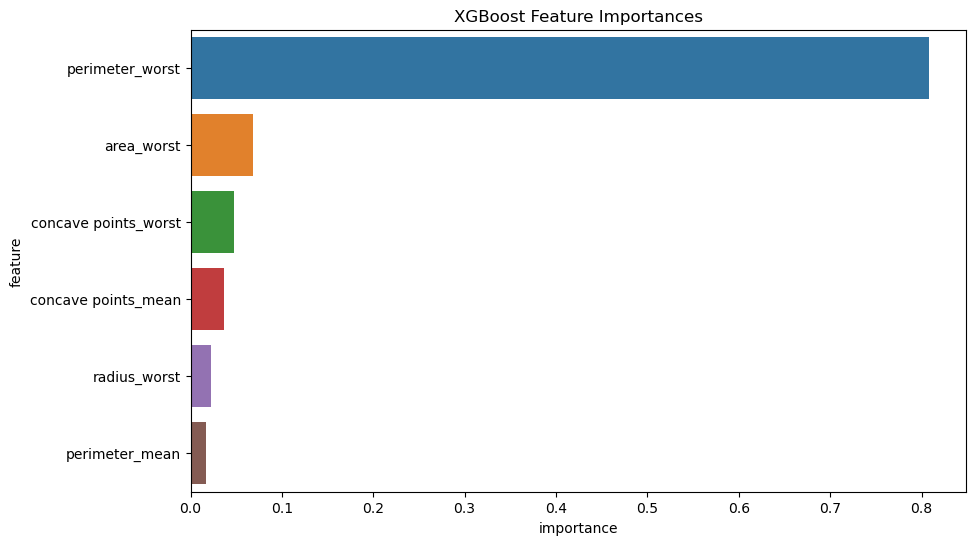

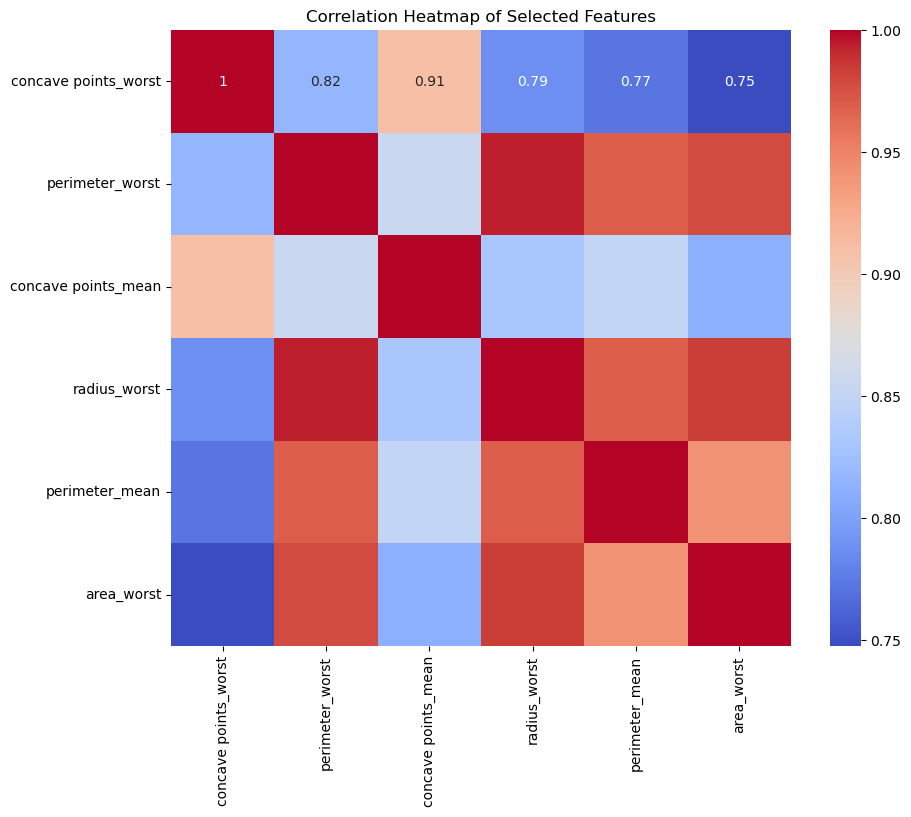

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score
import xgboost as xgb
from imblearn.over_sampling import SMOTE

# Loading the data
data = pd.read_csv('/Users/ajibolaoluwatobiloba/Desktop/personal project/BREAST CANCER/breast-cancer.csv')

# Separating features and target
X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis']

# Encoding the target variable
y = y.map({'M': 1, 'B': 0})

# Calculating correlation 
correlation = X.apply(lambda x: x.corr(y))
correlation_sorted = correlation.abs().sort_values(ascending=False)

# Selecting the top 6 features based on correlation
top_features = correlation_sorted.head(6).index.tolist()
print("Top 6 features based on correlation:")
print(top_features)

# Use these top features for modeling
X = data[top_features]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling the the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Training XGBoost model
model = xgb.XGBClassifier(
    random_state=42,
    scale_pos_weight=2,
    eval_metric='auc',
    use_label_encoder=False
)

# Fitting the model
model.fit(X_train_resampled, y_train_resampled)

# Making predictions on training set
y_train_pred_proba = model.predict_proba(X_train_scaled)[:, 1]
y_train_pred = (y_train_pred_proba >= 0.4).astype(int)

# Making predictions on test set
y_test_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
y_test_pred = (y_test_pred_proba >= 0.4).astype(int)

# Calculating accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Evaluaating the model on test set
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))
print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_test_pred_proba))

# Feature importance from XGBoost
importances = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
importances = importances.sort_values('importance', ascending=False).reset_index(drop=True)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importances)
plt.title('XGBoost Feature Importances')
plt.show()

# Correlation heatmap of selected features
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Features')
plt.show()

In [36]:
import xgboost
print(xgboost.__version__)


2.0.3
